(lecture04:histograms)=
# Histograms

Histograms offer a nice way to summarize the uncertainty/variability in scalar variables.
I am assuming that you have seen histograms in the past.
They work as follows:
- you split the interval in which your variable takes values in bins.
- you count how many times the variable falls inside its bin.

Let's look at some examples. First, set up our environment as usual, download and clean the dataset we introduced in {ref}`lecture03:pandas`:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import numpy as np
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)
   
# The url of the file we want to download
url = 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/master/data/temp_price.csv'
download(url)

import pandas as pd
temp_price = pd.read_csv('temp_price.csv')
clean_data = temp_price.dropna(axis=0).rename(columns={'Price per week': 'week_price',
                                                       'Price per day': 'daily_price'})
clean_data.head()

,household,date,score,t_out,t_unit,hvac,price,week_price,daily_price
0,a1,2019-01-06,85,38.599231,71.580704,35.113758,0.17303,6.075734,0.867962
1,a10,2019-01-06,70,38.599231,73.286260,63.949057,0.17303,11.065105,1.580729
2,a11,2019-01-06,61,38.599231,74.252046,147.612108,0.17303,25.541323,3.648760
3,a12,2019-01-06,65,38.599231,73.708482,74.394518,0.17303,12.872483,1.838926
4,a13,2019-01-06,66,38.599231,73.549554,173.095836,0.17303,29.950772,4.278682


Let's do the histogram of `t_unit` first:

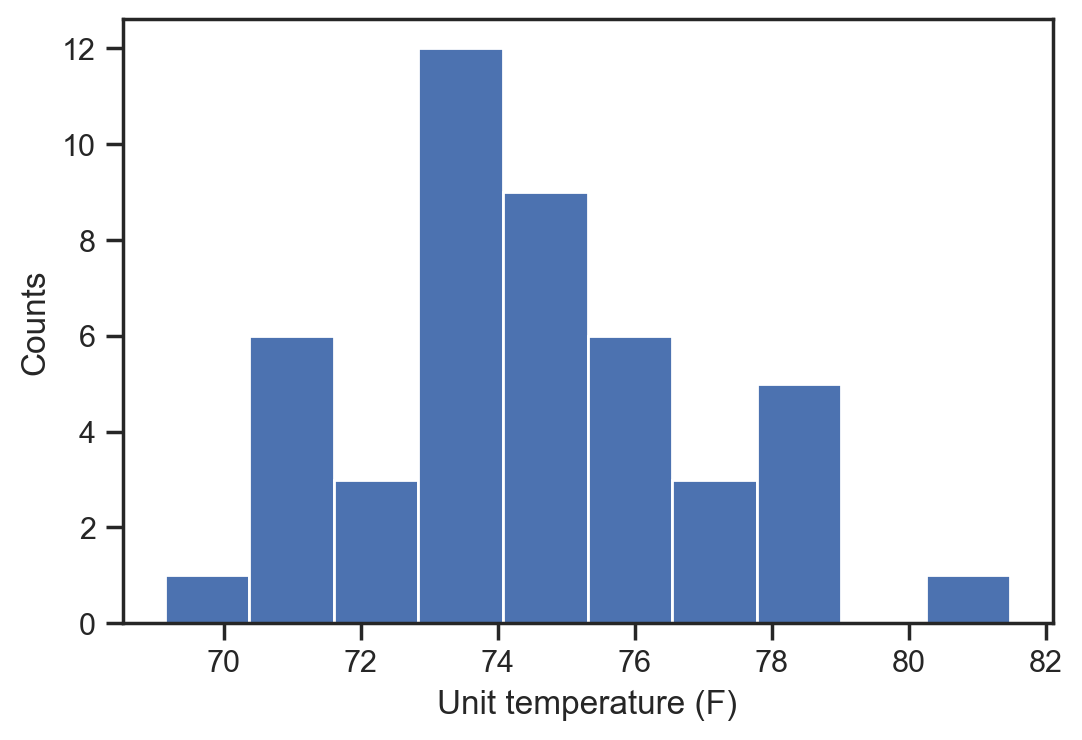

In [2]:
fig, ax = plt.subplots()
ax.hist(clean_data['t_unit'])
ax.set_xlabel('Unit temperature (F)')
ax.set_ylabel('Counts');

It is straightforward to read this.
Each bar gives you the number of households with internal temperature that fall with a bin.

Some times, we want to normalize the height of the bars so that the total area covered by the histogram is one.
To do this, you need to divide by the total number of observations and by the width of each bin.
What we get is a density.
We will see in later lectures that this is an approximation of a probability density of a random variable.
To get the density you need to use the keyword `density=True` in `hist`.
Here is how:

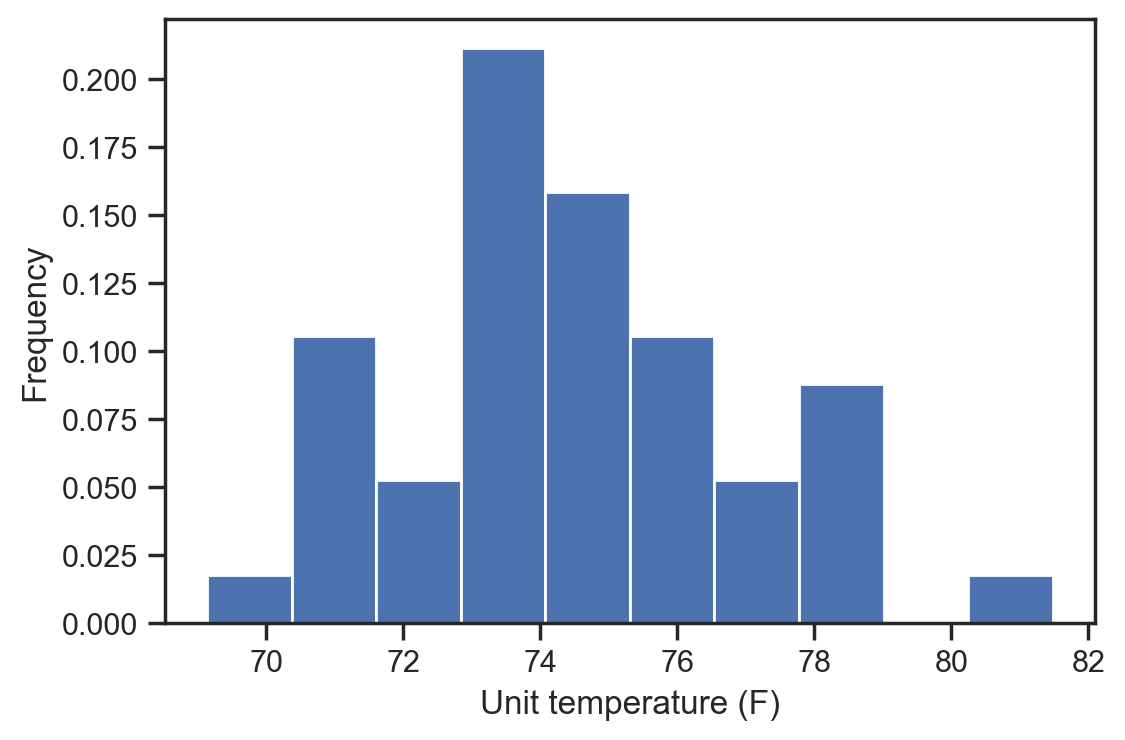

In [3]:
fig, ax = plt.subplots()
ax.hist(clean_data['t_unit'], density=True)
ax.set_xlabel('Unit temperature (F)')
ax.set_ylabel('Frequency');

You can also change the bin number. 
The default is 10. Let's make it 5.

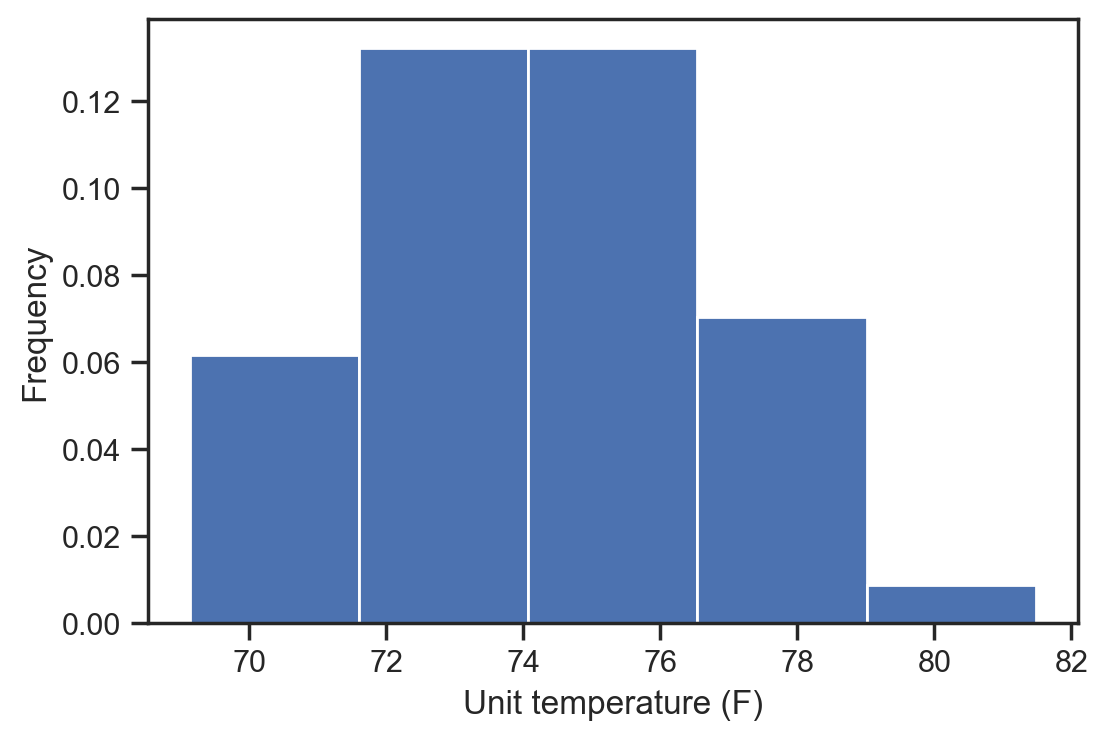

In [4]:
fig, ax = plt.subplots()
ax.hist(clean_data['t_unit'], density=True, bins=5)
ax.set_xlabel('Unit temperature (F)')
ax.set_ylabel('Frequency');

Alternatively, you can also specify the bins on your own.
You just have to provide the bin edges.
Let's pick: $(65, 72, 76, 82)$.
Here we go:

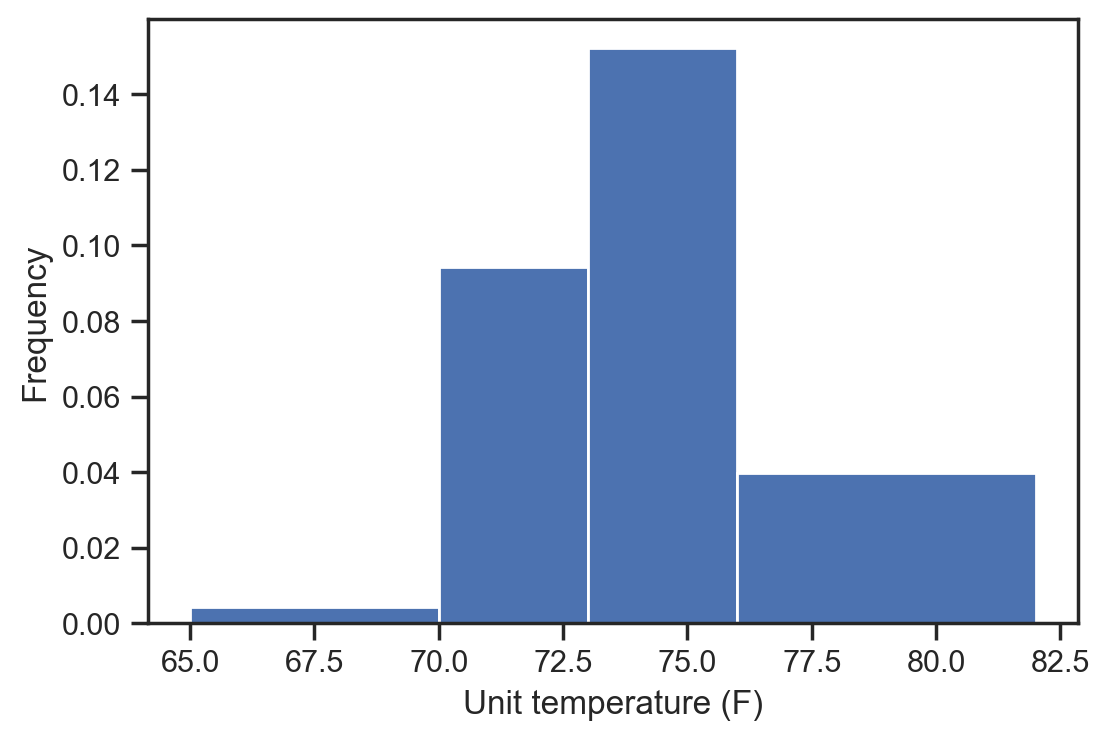

In [5]:
fig, ax = plt.subplots()
ax.hist(clean_data['t_unit'], density=True, bins=(65, 70, 73, 76, 82))
ax.set_xlabel('Unit temperature (F)')
ax.set_ylabel('Frequency');

Let's plot a few more things on our histogram.
For example, let's plot the raw data as points on the x-axis.
Here is how we can do that:

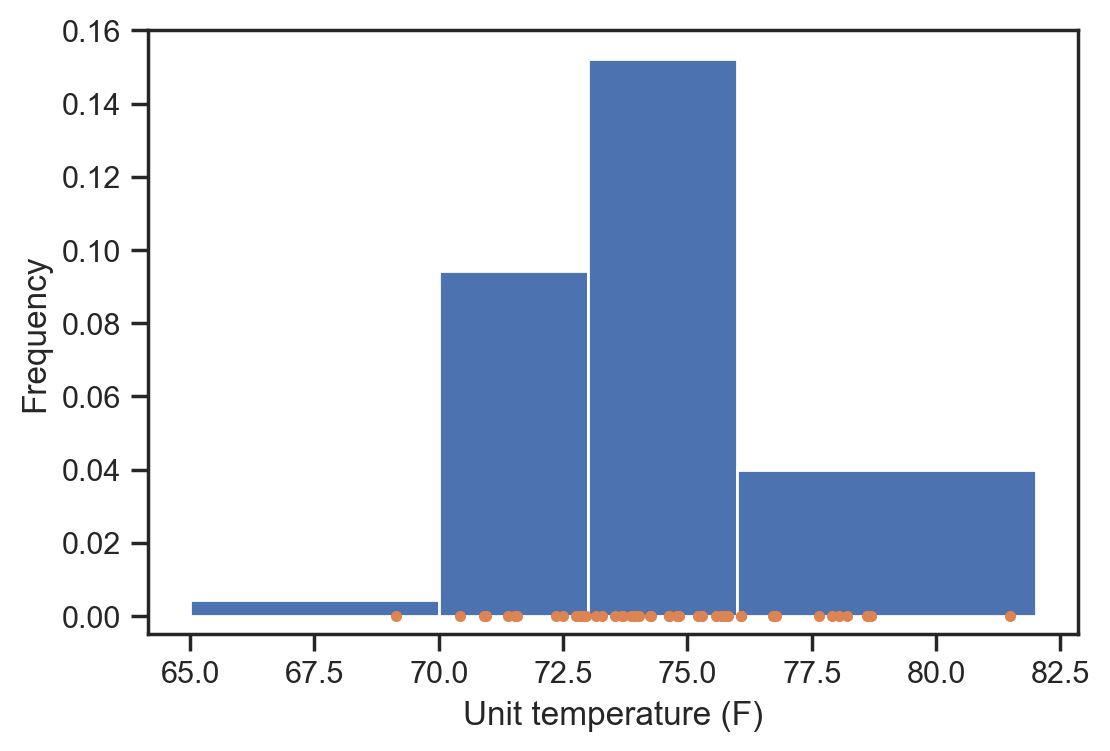

In [6]:
# This is the histogram
fig, ax = plt.subplots()
ax.hist(clean_data['t_unit'], density=True, bins=(65, 70, 73, 76, 82))
ax.set_xlabel('Unit temperature (F)')
ax.set_ylabel('Frequency')
# Add a plot of points with x axis being the temperatures and the
# y axis being zeros
ax.plot(clean_data['t_unit'], np.zeros(clean_data.shape[0]), '.')
# Move the plotting range a bit to the negative so that we can see the points
ax.set_ylim(-0.005, 0.16);

This is nice. Let's add some more information here.
What about using a big red cross for marking the avarege temperature?
Let's do it!

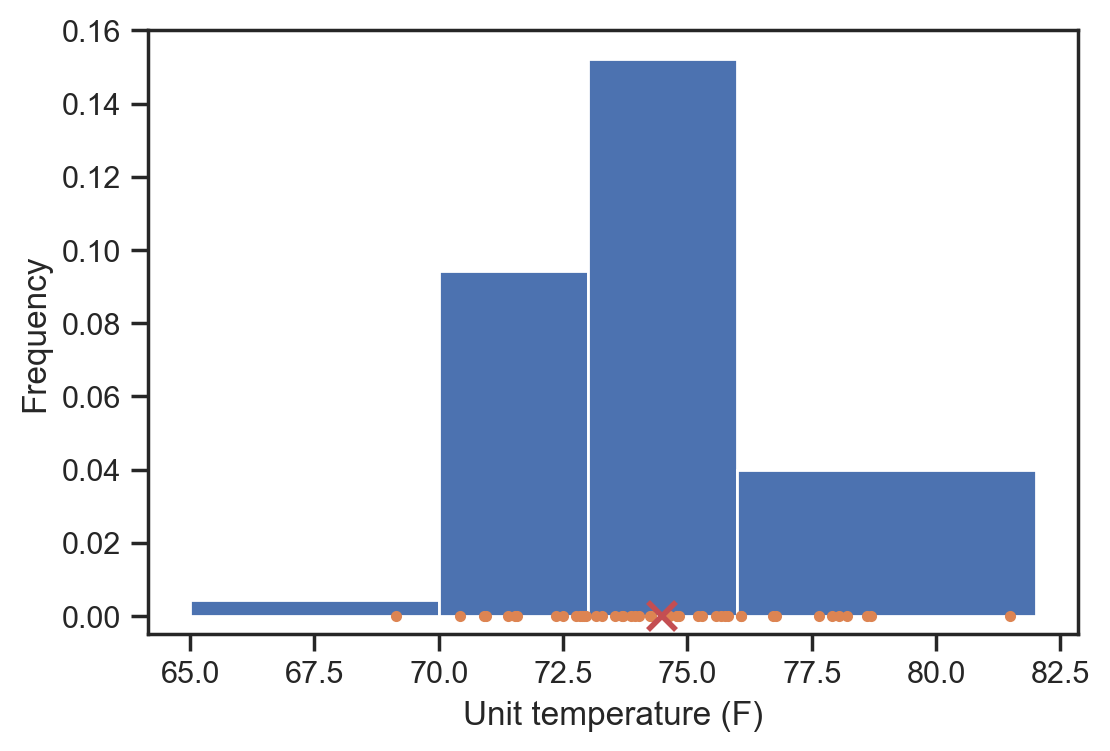

In [7]:
average_unit_T = clean_data['t_unit'].mean()

# Same us before
fig, ax = plt.subplots()
ax.hist(clean_data['t_unit'], density=True, bins=(65, 70, 73, 76, 82))
ax.set_xlabel('Unit temperature (F)')
ax.set_ylabel('Frequency')
ax.plot(clean_data['t_unit'], np.zeros(clean_data.shape[0]), '.')
ax.set_ylim(-0.005, 0.16)

# But now I am adding the red cross at the average
ax.plot(average_unit_T, 0, 'rx', markersize=10, markeredgewidth=2);

There is no limit to what you can plot with matplotlib!

## Questions

Write some code to draw the histogram of the `score`.

In [8]:
# your code here